In [11]:
# Re-import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import numpy as np


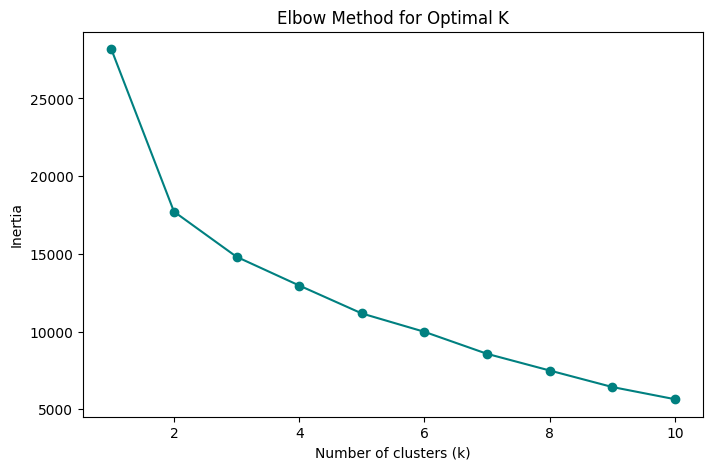

In [12]:

# Reload the dataset
data_path = r'D:\Mini-Project\Advanced Visualization Dashboard\AINexus\data\processed_dataset.csv'
data = pd.read_csv(data_path)

data_copy = data.copy()

# Re-encode categorical columns for clustering
label_encoders = {}
for col in ['Task Type', 'Model Sophistication', 'Domain']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Select features and standardize
X = data[['Tasks', 'Task Type', 'AI Models', 'Model Sophistication', 'AI Workload Ratio', 'Domain']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine inertia for elbow method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', color='teal')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


         AI Impact       Tasks  Task Type    AI Models  Model Sophistication  \
Cluster                                                                        
1         0.213982  738.032080   0.683075  2833.767146              0.973451   
2         0.359089  191.040887   0.721067  1188.679487              0.246015   

         AI Workload Ratio    Domain  
Cluster                               
1                 0.266926  5.096239  
2                 0.164786  4.895703  


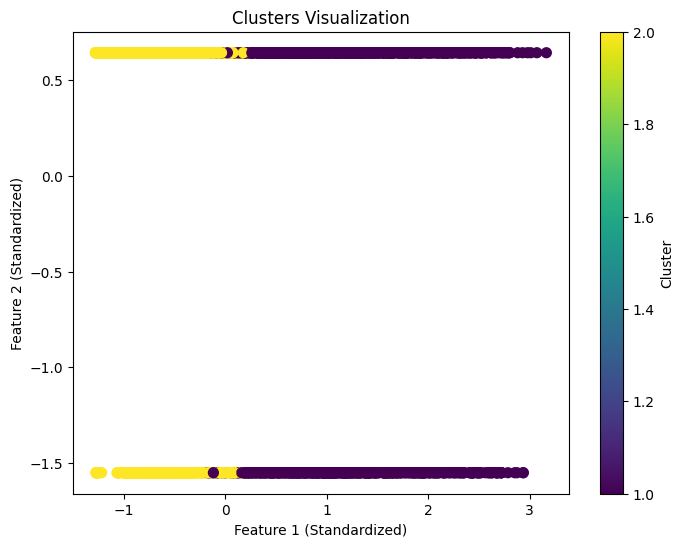

In [13]:

label_encoders = {}
for col in ['Task Type', 'Model Sophistication', 'Domain']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Select features for clustering
X = data[['Tasks', 'Task Type', 'AI Models', 'Model Sophistication', 'AI Workload Ratio', 'Domain']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
optimal_k = 2  # Assuming 4 clusters based on elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled) + 1

data

# # Analyze clusters
cluster_summary = data.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['Cluster'], cmap='viridis', s=50)
plt.title('Clusters Visualization')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.colorbar(label='Cluster')
plt.show()

In [14]:
# Reverse-transform the encoded columns to original categories
# decoded_data = data.copy()

# # Replace encoded values with original categories using LabelEncoders
# for col, encoder in label_encoders.items():
#     decoded_data[col] = encoder.inverse_transform(data[col])

# # Recalculate cluster summary with decoded categories
# cluster_summary_decoded = decoded_data.groupby('Cluster').agg({
#     'AI Impact': 'mean',
#     'Tasks': 'mean',
#     'Task Type': lambda x: x.mode()[0],  # Most frequent category
#     'AI Models': 'mean',
#     'Model Sophistication': lambda x: x.mode()[0],
#     'AI Workload Ratio': 'mean',
#     'Domain': lambda x: x.mode()[0]  # Most frequent category
# })

# cluster_summary_decoded

# print(data_copy.groupby('Domain').count())
# decoded_data.groupby('Domain').count()



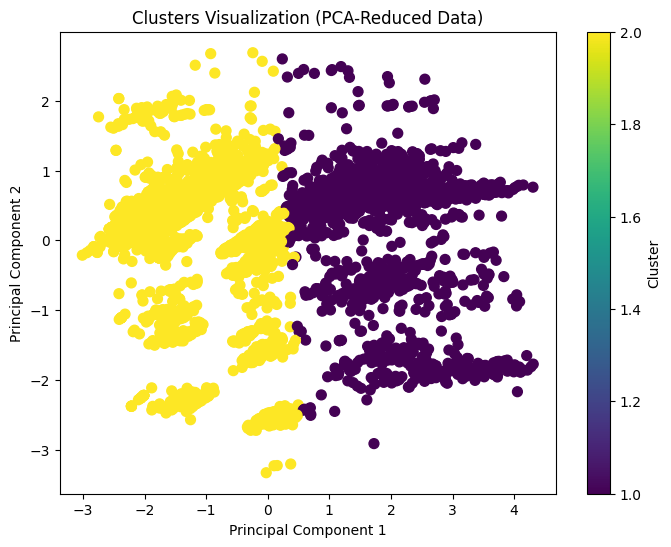

In [15]:
from sklearn.decomposition import PCA


# Reduce to 2 dimensions with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters with PCA-reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='viridis', s=50)
plt.title('Clusters Visualization (PCA-Reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [16]:
cluster_summary = data.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

         AI Impact       Tasks  Task Type    AI Models  Model Sophistication  \
Cluster                                                                        
1         0.213982  738.032080   0.683075  2833.767146              0.973451   
2         0.359089  191.040887   0.721067  1188.679487              0.246015   

         AI Workload Ratio    Domain  
Cluster                               
1                 0.266926  5.096239  
2                 0.164786  4.895703  


In [21]:
# Reverse-transform the encoded columns to original categories
decoded_data = data.copy()

# Replace encoded values with original categories using LabelEncoders
for col, encoder in label_encoders.items():
    decoded_data[col] = encoder.inverse_transform(data[col])

# Recalculate cluster summary with decoded categories
cluster_summary_decoded = decoded_data.groupby(['Cluster', 'Task Type']).mean(numeric_only=True)

# agg({
#     'AI Impact': 'mean',
#     'Tasks': 'mean',
#     'Task Type': lambda x: x.mode()[0],  # Most frequent category
#     'AI Models': 'mean',
#     'Model Sophistication': lambda x: x.mode()[0],
#     'AI Workload Ratio': 'mean',
#     'Domain': lambda x: x.mode()[0]  # Most frequent category
# })

cluster_summary_decoded


AI Impact       Tasks    AI Models  Model Sophistication  \
Cluster Task Type                                                             
1       0           0.250401  783.795812  2921.191972              0.977312   
        1           0.197085  716.799190  2793.204858              0.971660   
2       0           0.371540  202.255901  1360.568944              0.385093   
        1           0.354272  186.702547  1122.186929              0.192215   

                   AI Workload Ratio    Domain  
Cluster Task Type                               
1       0                   0.277483  5.143106  
        1                   0.262028  5.074494  
2       0                   0.151354  4.980124  
        1                   0.169982  4.863047

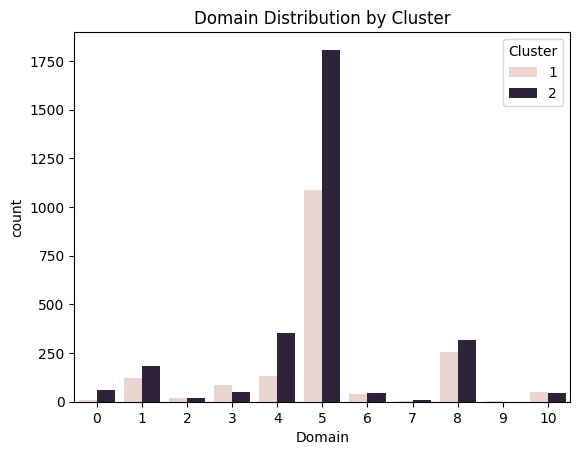

In [26]:
import seaborn as sns
import plotly.express as px

# Visualize domain distribution across clusters
sns.countplot(data=data, x='Domain', hue='Cluster')
plt.title('Domain Distribution by Cluster')
plt.show()

# fig = px.barplot(data=data, x='Domain', hue='Cluster')
# fig.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder

path = r"processed_dataset.csv"
data = pd.read_csv(path)  # Update path
    
    # One-hot encoding for Task Type and Model Sophistication 
encoders = {
        'Task Type': OneHotEncoder(),
        'Model Sophistication': OneHotEncoder()
    }
    
for column, encoder in encoders.items():
        encoded = encoder.fit_transform(data[[column]]).toarray()
        encoded_cols = [f"{column}_{cat}" for cat in encoder.categories_[0]]
        encoded_df = pd.DataFrame(encoded, columns=encoded_cols, index=data.index)
        data = pd.concat([data, encoded_df], axis=1)
    
    # One-hot encoding for Task Type and Model Sophistication
task_type_encoded = encoders['Task Type'].transform(data[['Task Type']]).toarray()
model_sophistication_encoded = encoders['Model Sophistication'].transform(data[['Model Sophistication']]).toarray()

    # Combine encoded features
encoded_columns = list(encoders['Task Type'].categories_[0]) + list(encoders['Model Sophistication'].categories_[0])
encoded_features = np.hstack([task_type_encoded, model_sophistication_encoded])
encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns, index=data.index)

    # Combine all features for training
X = pd.concat([data[['Tasks', 'AI Models', 'AI Workload Ratio']], encoded_df], axis=1)
y = data['AI Impact']

    # Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, y)
print('Model Score: ', rf_model.score())

    # # Prepare features and target for Random Forest
    # X = pd.concat([data[['Tasks', 'AI Models', 'AI Workload Ratio']], encoded_df], axis=1)
    # y = data['AI Impact']
    # rf_model = RandomForestRegressor(random_state=42)
    # rf_model.fit(X, y)
    
    # Prepare KMeans model
features = data[['AI Impact', 'Tasks', 'AI Models', 'AI Workload Ratio']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

iso_forest = IsolationForest(contamination=0.5, random_state=0)  # Adjust contamination
outliers = iso_forest.fit_predict(features_scaled) == -1  # -1 labels anomalies

    # Filter out anomalies
features_filtered = features_scaled[~outliers]
data_filtered = data[~outliers]

kmeans = KMeans(n_clusters=2, random_state=0)
data_filtered['Cluster'] = kmeans.fit_predict(features_filtered)

Model Score:  <bound method RegressorMixin.score of RandomForestRegressor(random_state=42)>


C:\Users\aqdas\AppData\Local\Temp\ipykernel_18660\3491389802.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Cluster'] = kmeans.fit_predict(features_filtered)
